# RL_Navigation Results

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
PATH = "/Volumes/BC_Clutch/Dropbox/DeepRLND/rl_navigation/"
CHART_PATH = PATH + "charts/"

roll_length = 100

In [5]:
def chart_results(CHART_PATH, pklfile):
    pklpath = CHART_PATH + pklfile
    timestamp = pklpath.split(".")[-2].split("-")[-1]
    chartpath = CHART_PATH + f"NavigationTrainChart-{timestamp}.png"

    with open(pklpath, 'rb') as handle:
        results = pd.DataFrame(pickle.load(handle))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for mod in results.columns:
        scores = results[mod]['scores']
        avg_scores = []
        for i in range(1,len(scores)+1):
            start = np.max(i-roll_length,0)
            end = i
            nm = np.sum(scores[start:end])
            dn = len(scores[start:end])
            avg_scores.append(nm/dn)
        plt.plot(np.arange(len(scores)), avg_scores,label=mod)
        plt.ylabel('Score')
        plt.xlabel('Episode #')
        plt.legend()
    plt.savefig(chartpath)
    print(f"Chart saved at {chartpath}")
    plt.show()
    display(results)
    return results

/Users/brianmcmahon/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


Chart saved at /Volumes/BC_Clutch/Dropbox/DeepRLND/rl_navigation/charts/NavigationTrainChart-201811240921.png


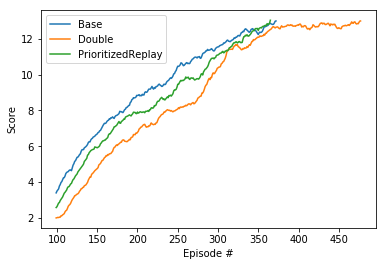

,Base,Double,PrioritizedReplay
action_size,4,4,4
eps_decay,0.995,0.995,0.995
eps_end,0.01,0.01,0.01
eps_start,0.4,0.4,0.4
max_t,1000,1000,1000
n_episodes,1000,1000,1000
scores,"[0.0, 2.0, 1.0, 0.0, 2.0, -3.0, 1.0, -1.0, 0.0...","[0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 1.0, 1.0, -1.0,...","[0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, -2.0, 0.0..."
seed,0,0,0
state_size,37,37,37
train_mode,True,True,True


In [6]:
results = chart_results(CHART_PATH, "ResultDict-201811240921.pkl")